<a href="https://colab.research.google.com/github/Redwolf0023/AutoMLvsBayesian/blob/main/Student_Performance_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and install the dependencies needed for H2O
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
openjdk version "11.0.20" 2023-07-18
OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# initialise the cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 20 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_kwyiok
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.053 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# read the input file through pandas and parse the dataset
df = pd.read_csv('data.csv', sep = ';')
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target_col = df.columns[-1]
feature_col = df.columns[:-1]
df[target_col] = df[target_col].asfactor()

In [ ]:
# split the dataframe into train and test split
train, test, validation = df.split_frame(ratios=[0.8, 0.15], seed = 12)

In [ ]:
# train the h2o model
model = H2OAutoML(max_models=20, seed = 1234)
model.train(x = feature_col, y = target_col, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),20/20
# GBM base models (used / total),7/7
# XGBoost base models (used / total),6/6
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),4/4
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
# get the top performing models through leaderboard
lb = h2o.automl.get_leaderboard(model, extra_columns = "training_time_ms")
lb

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms
StackedEnsemble_AllModels_1_AutoML_2_20230812_105014,0.304258,0.557392,0.428968,0.184014,57396
StackedEnsemble_BestOfFamily_1_AutoML_2_20230812_105014,0.306053,0.563838,0.430528,0.185355,26658
GBM_grid_1_AutoML_2_20230812_105014_model_2,0.306446,0.567437,0.43153,0.186218,2211
GBM_grid_1_AutoML_2_20230812_105014_model_1,0.306714,0.573457,0.430579,0.185398,2182
GBM_2_AutoML_2_20230812_105014,0.308018,0.572048,0.433064,0.187545,3231
GBM_3_AutoML_2_20230812_105014,0.308039,0.571737,0.432294,0.186878,2094
GBM_4_AutoML_2_20230812_105014,0.308865,0.573732,0.431979,0.186606,2679
GBM_5_AutoML_2_20230812_105014,0.311537,0.571092,0.432801,0.187317,2141
XGBoost_grid_1_AutoML_2_20230812_105014_model_2,0.313273,0.570838,0.433376,0.187814,682
XGBoost_3_AutoML_2_20230812_105014,0.313712,0.575493,0.431495,0.186188,887


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20230812_105014_model_2,0.26685,0.534226,0.416909,0.173813,2211,0.156526,GBM
GBM_grid_1_AutoML_2_20230812_105014_model_1,0.267638,0.535222,0.413,0.170569,2182,0.134457,GBM
GBM_2_AutoML_2_20230812_105014,0.269004,0.528386,0.412499,0.170155,3231,0.122977,GBM
GBM_3_AutoML_2_20230812_105014,0.269791,0.527079,0.413132,0.170678,2094,0.117061,GBM
StackedEnsemble_AllModels_1_AutoML_2_20230812_105014,0.273597,0.514689,0.414107,0.171485,57396,1.12693,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230812_105014,0.277572,0.514995,0.41502,0.172242,26658,0.617912,StackedEnsemble
GBM_5_AutoML_2_20230812_105014,0.283963,0.534039,0.416974,0.173867,2141,0.113683,GBM
XGBoost_grid_1_AutoML_2_20230812_105014_model_2,0.287698,0.530309,0.419241,0.175763,682,0.016786,XGBoost
XGBoost_grid_1_AutoML_2_20230812_105014_model_1,0.287791,0.548829,0.419555,0.176027,1150,0.019382,XGBoost
GBM_4_AutoML_2_20230812_105014,0.288299,0.537533,0.417803,0.174559,2679,0.190009,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20230812_105014

Dropout,Enrolled,Graduate,Error,Rate
153.0,20.0,26.0,0.2311558,46 / 199
19.0,59.0,40.0,0.5,59 / 118
10.0,22.0,325.0,0.0896359,32 / 357
182.0,101.0,391.0,0.2032641,137 / 674


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

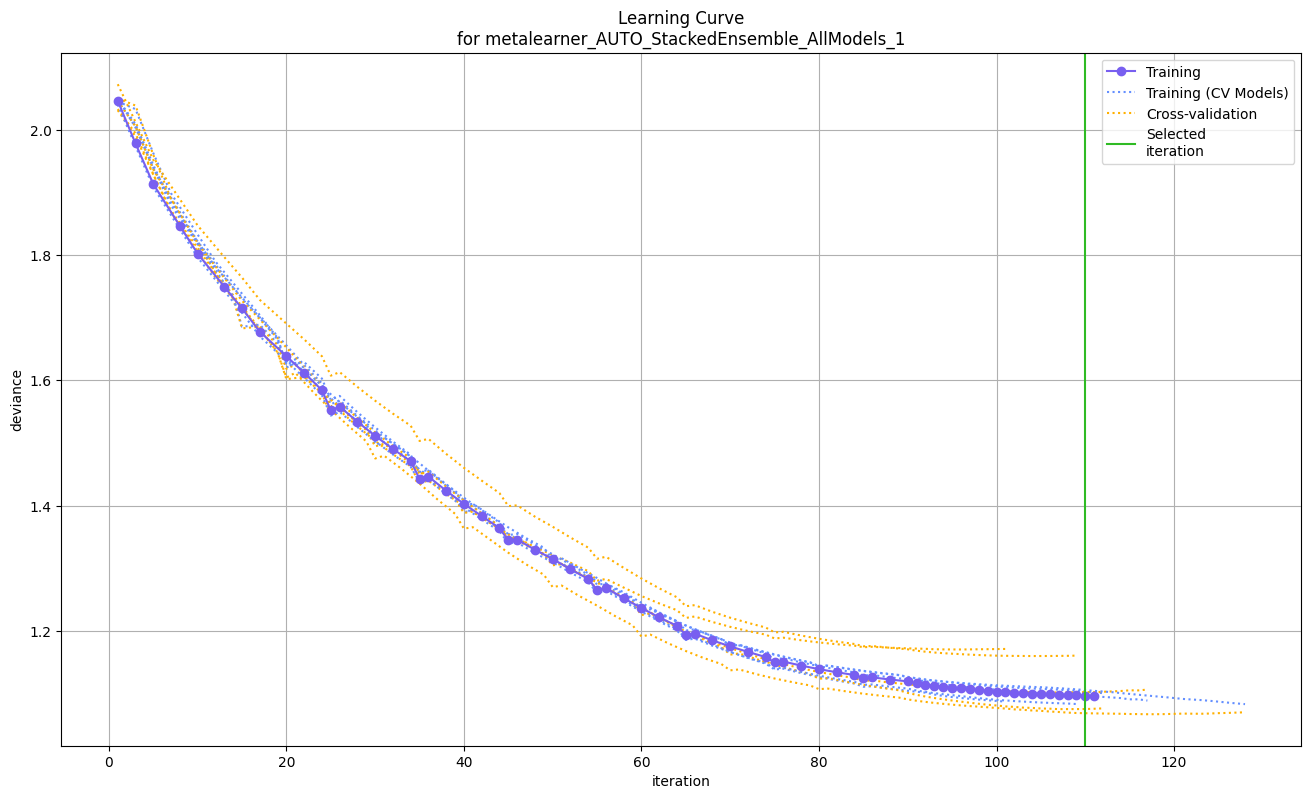

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

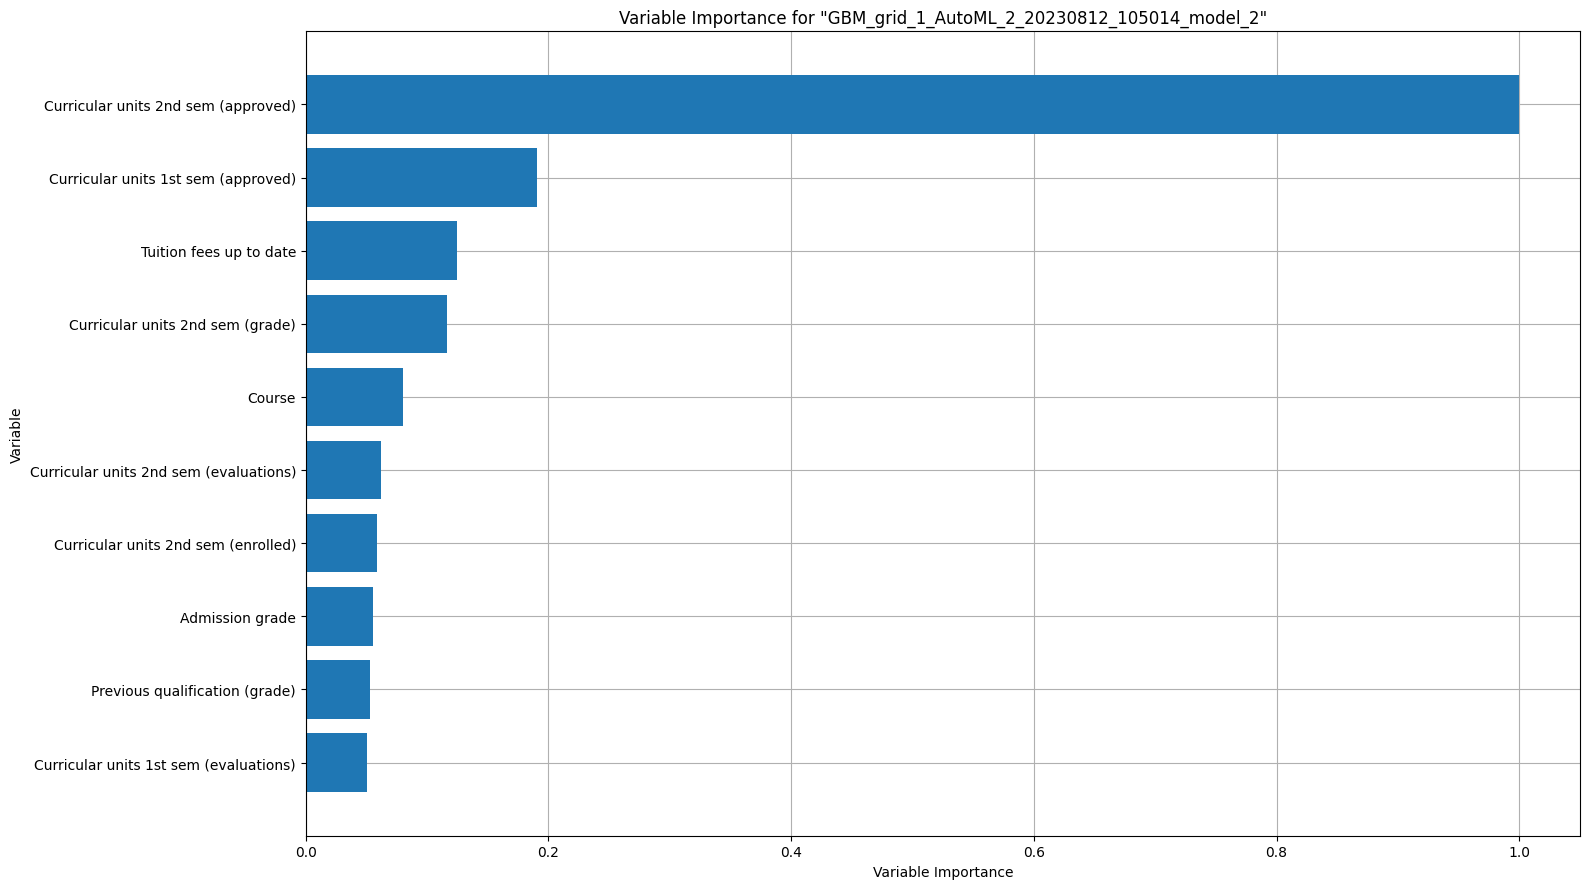

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


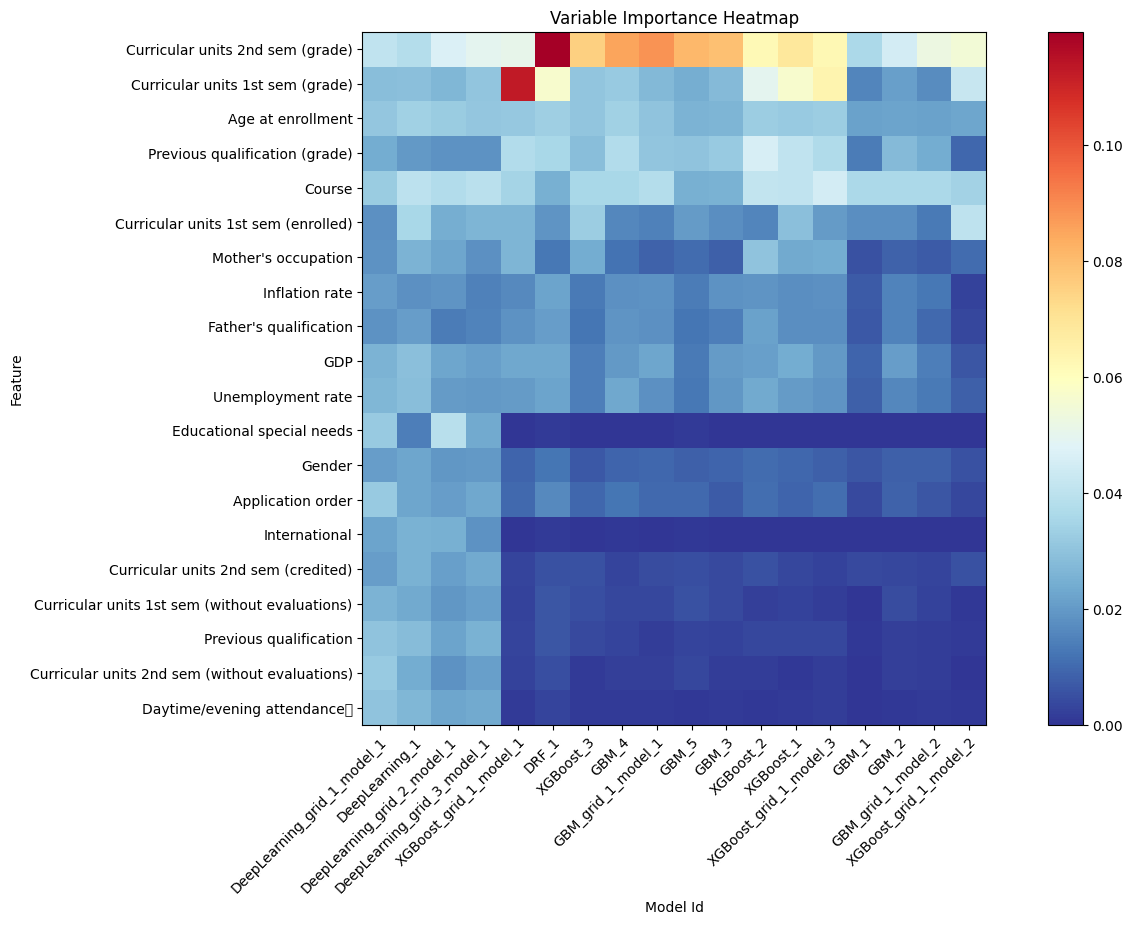

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

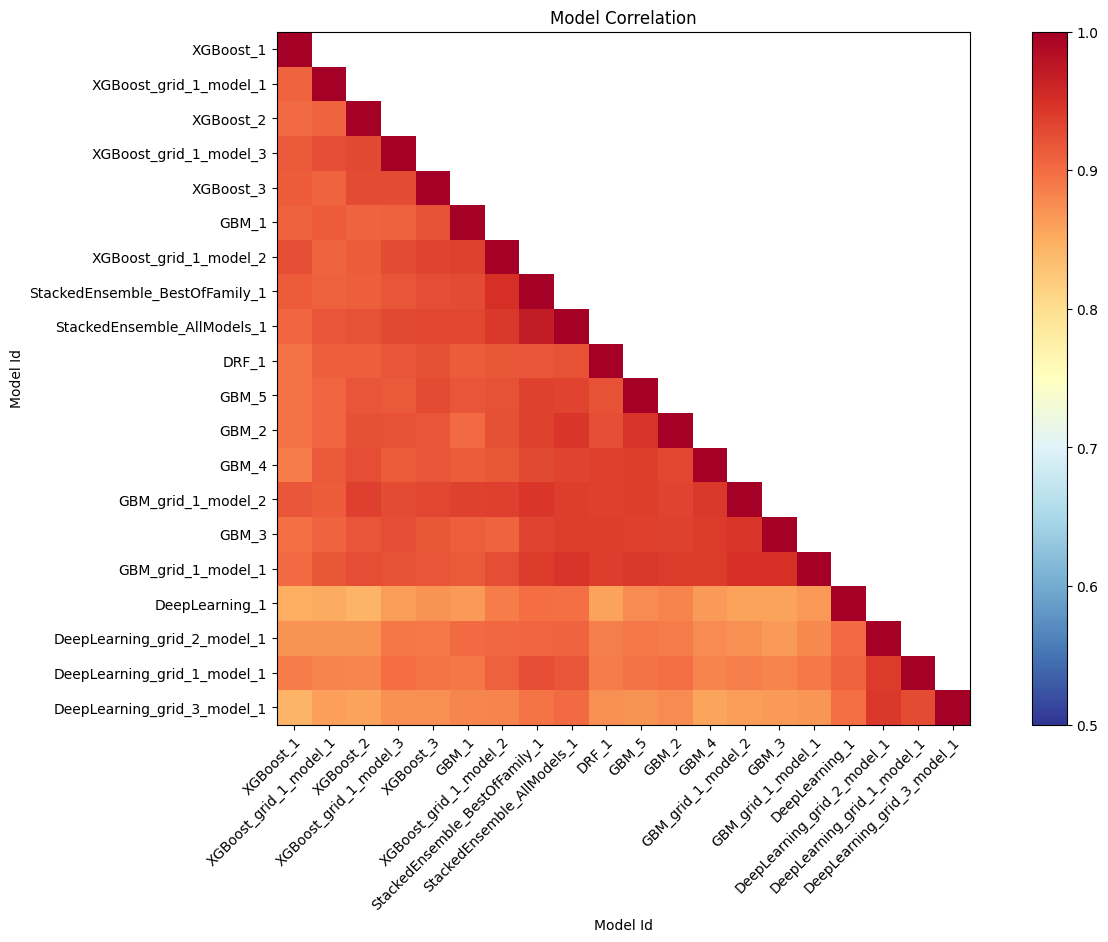

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

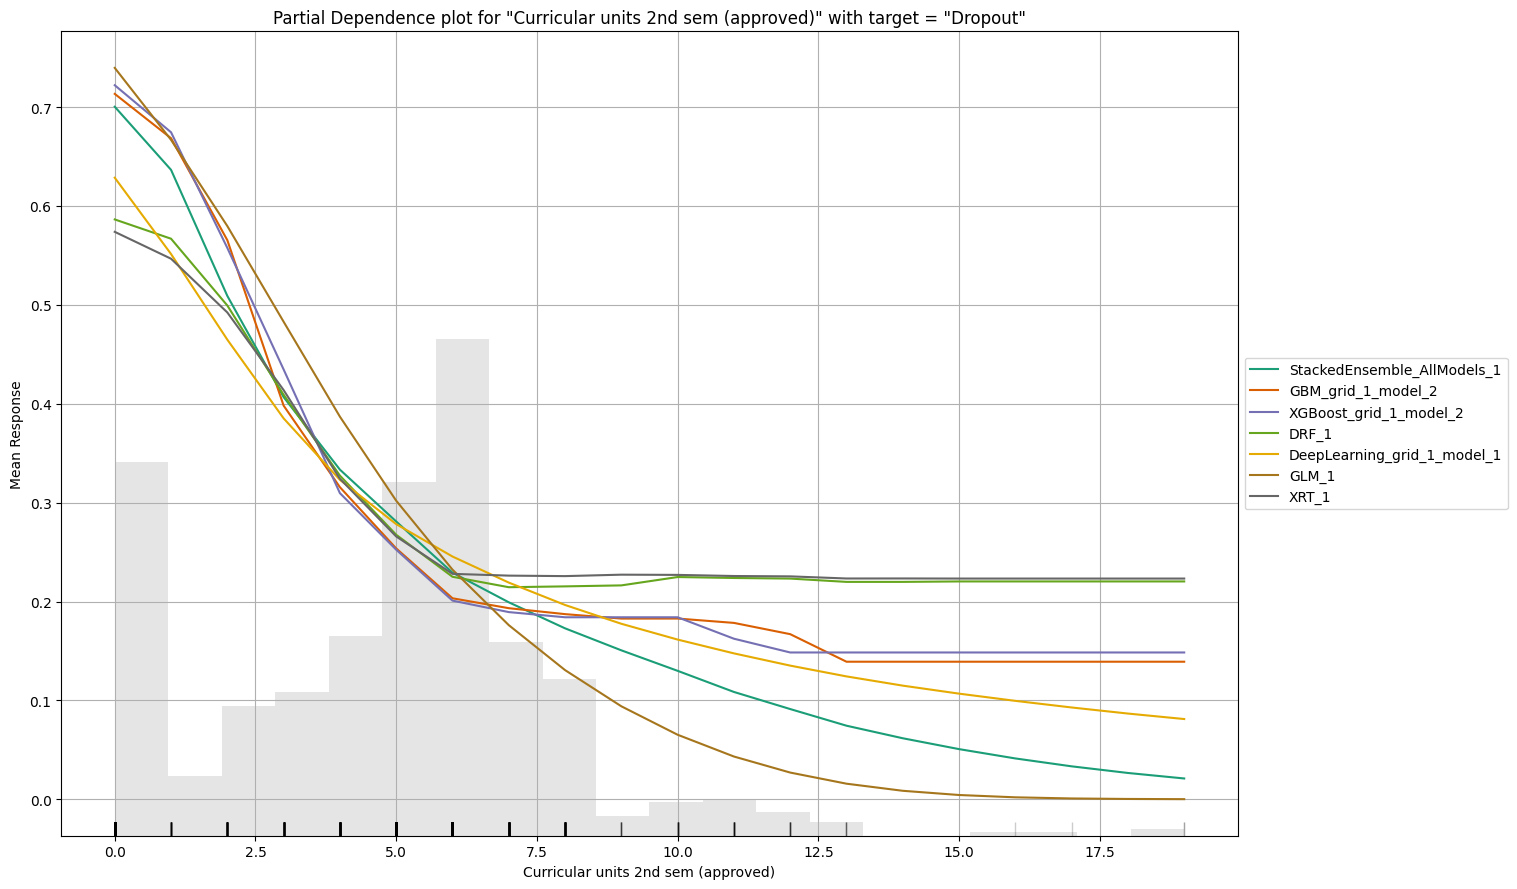

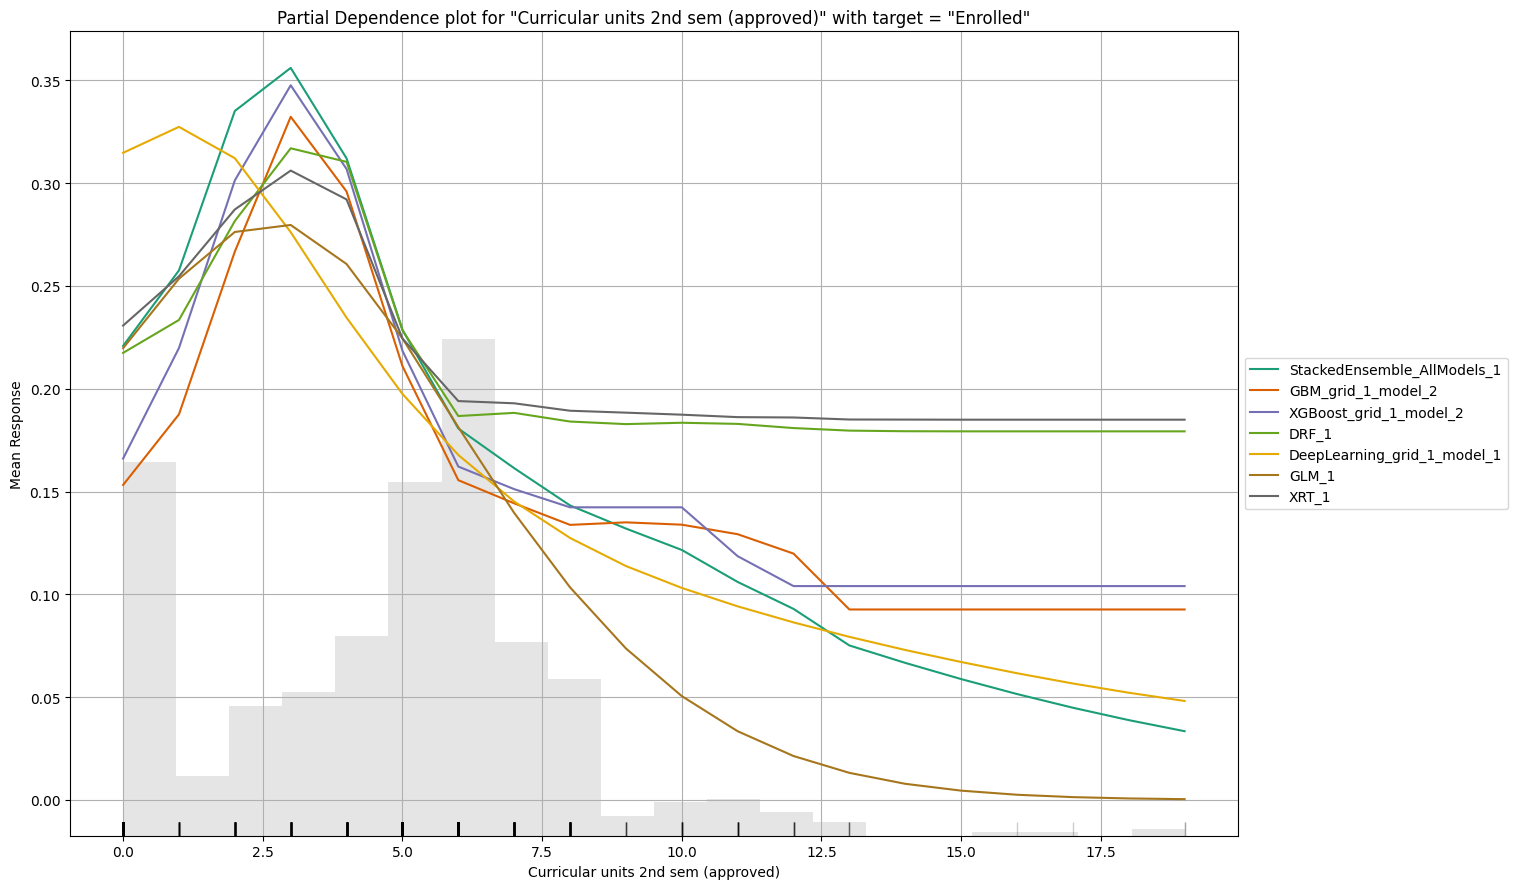

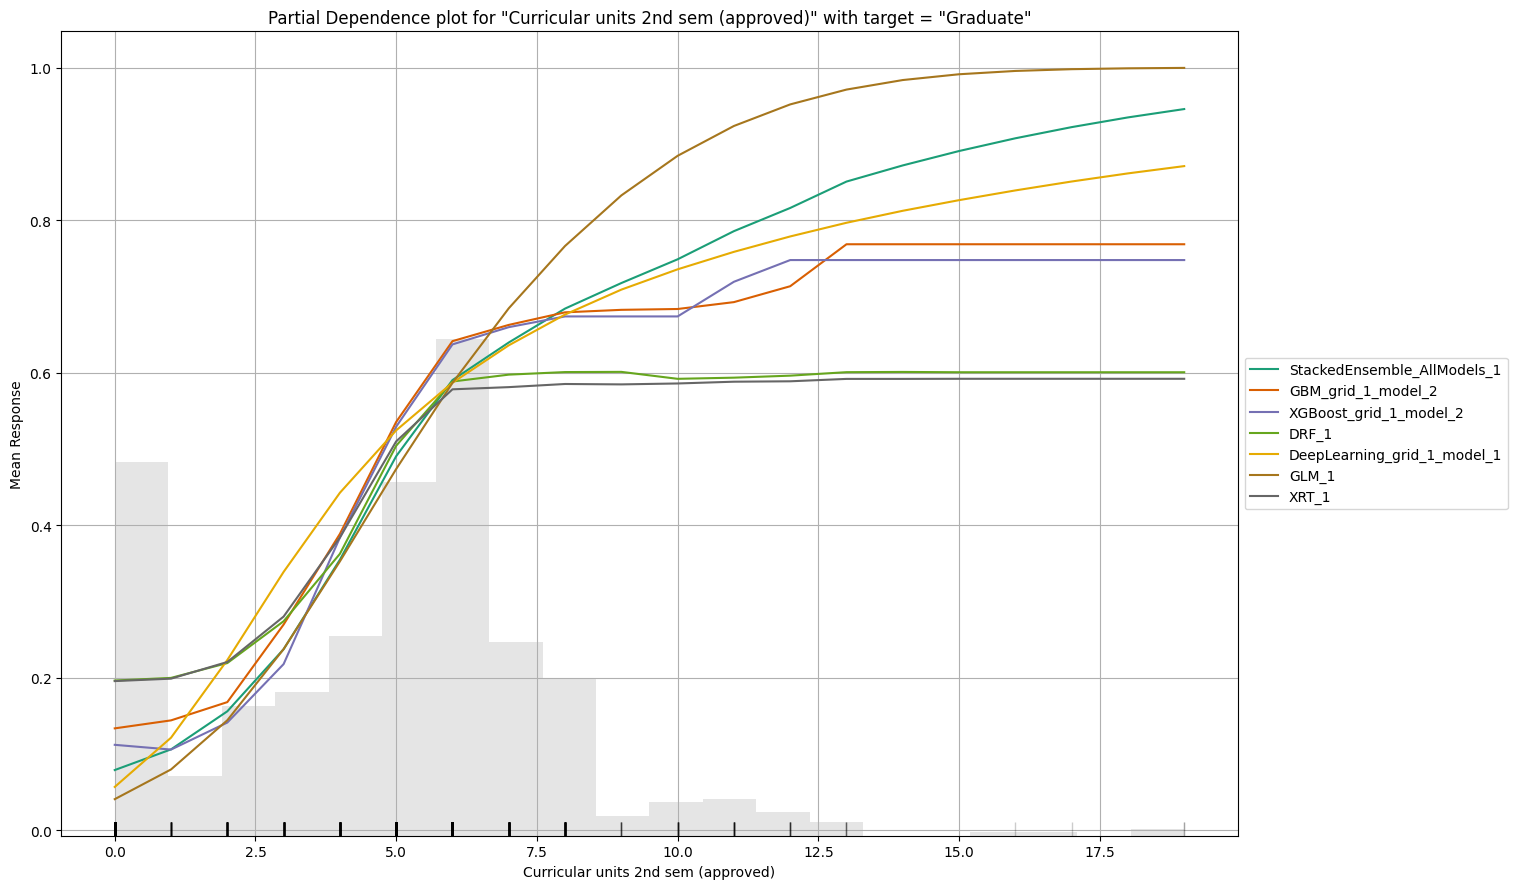

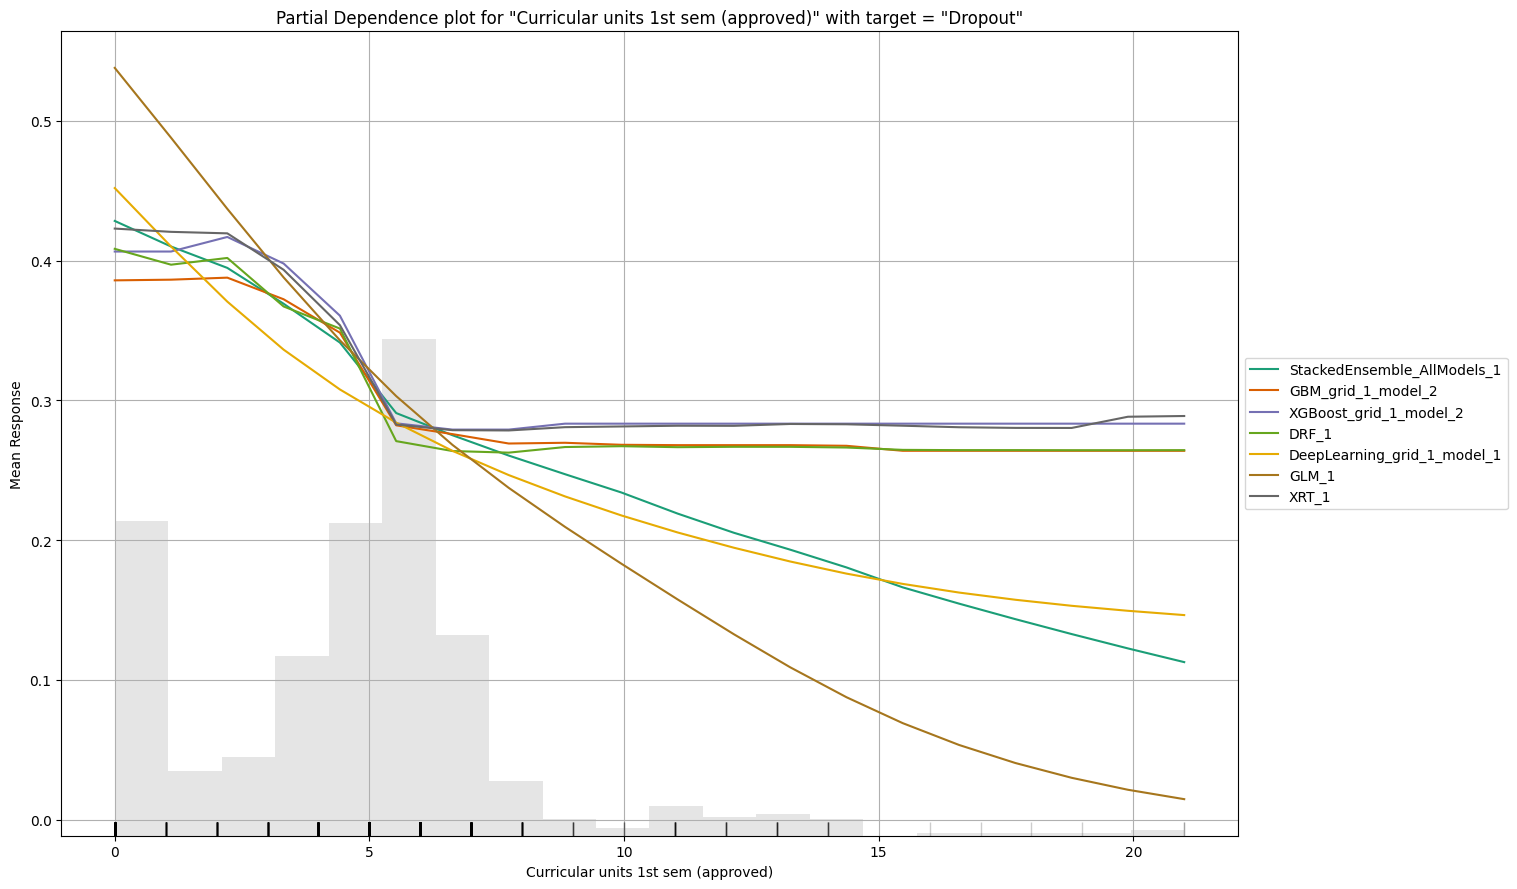

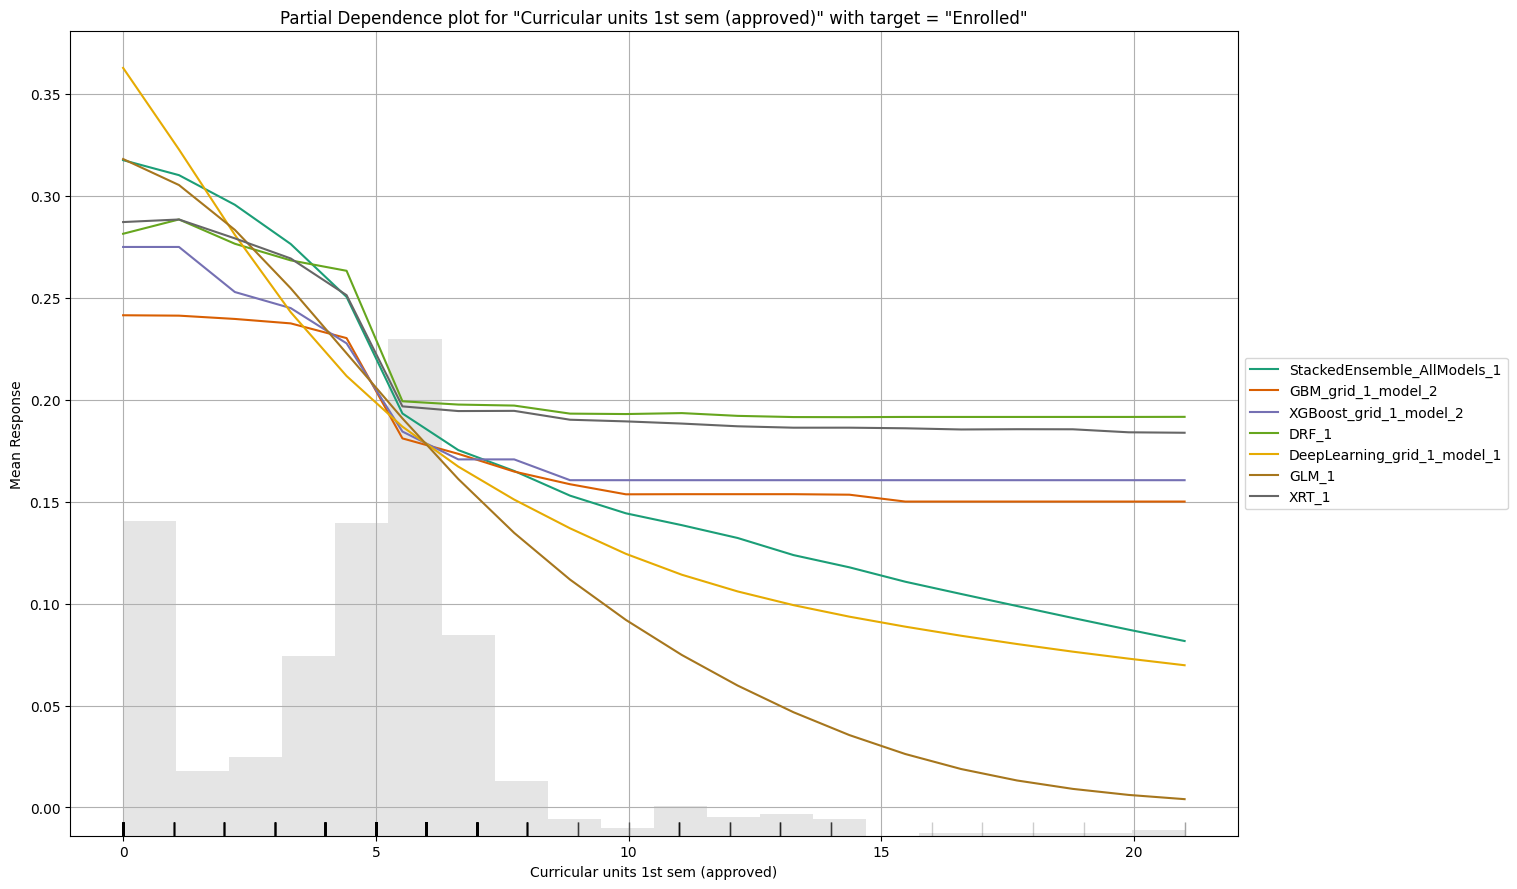

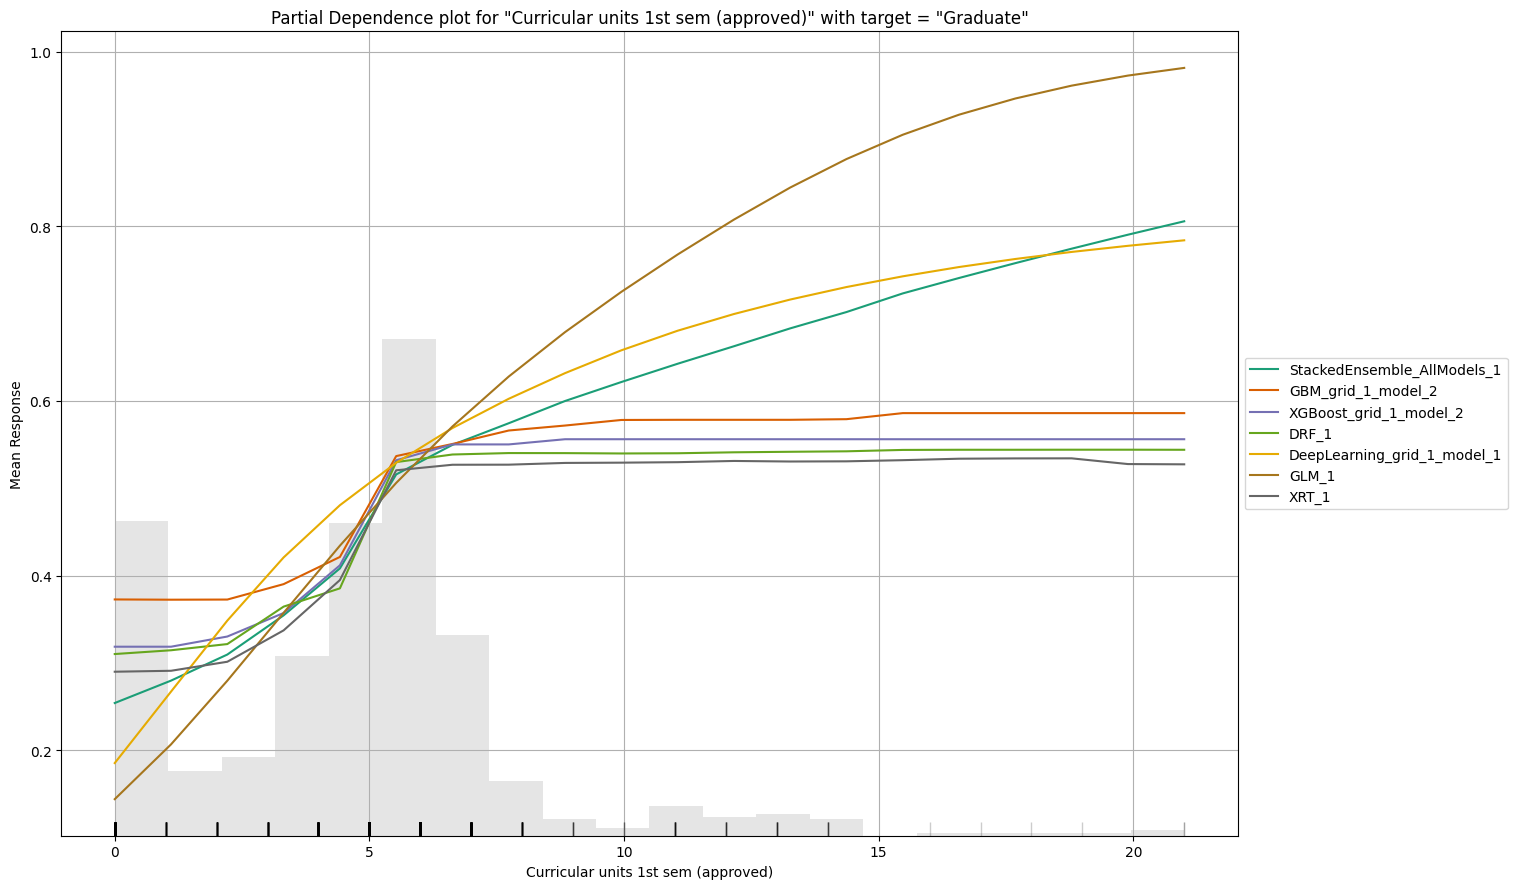

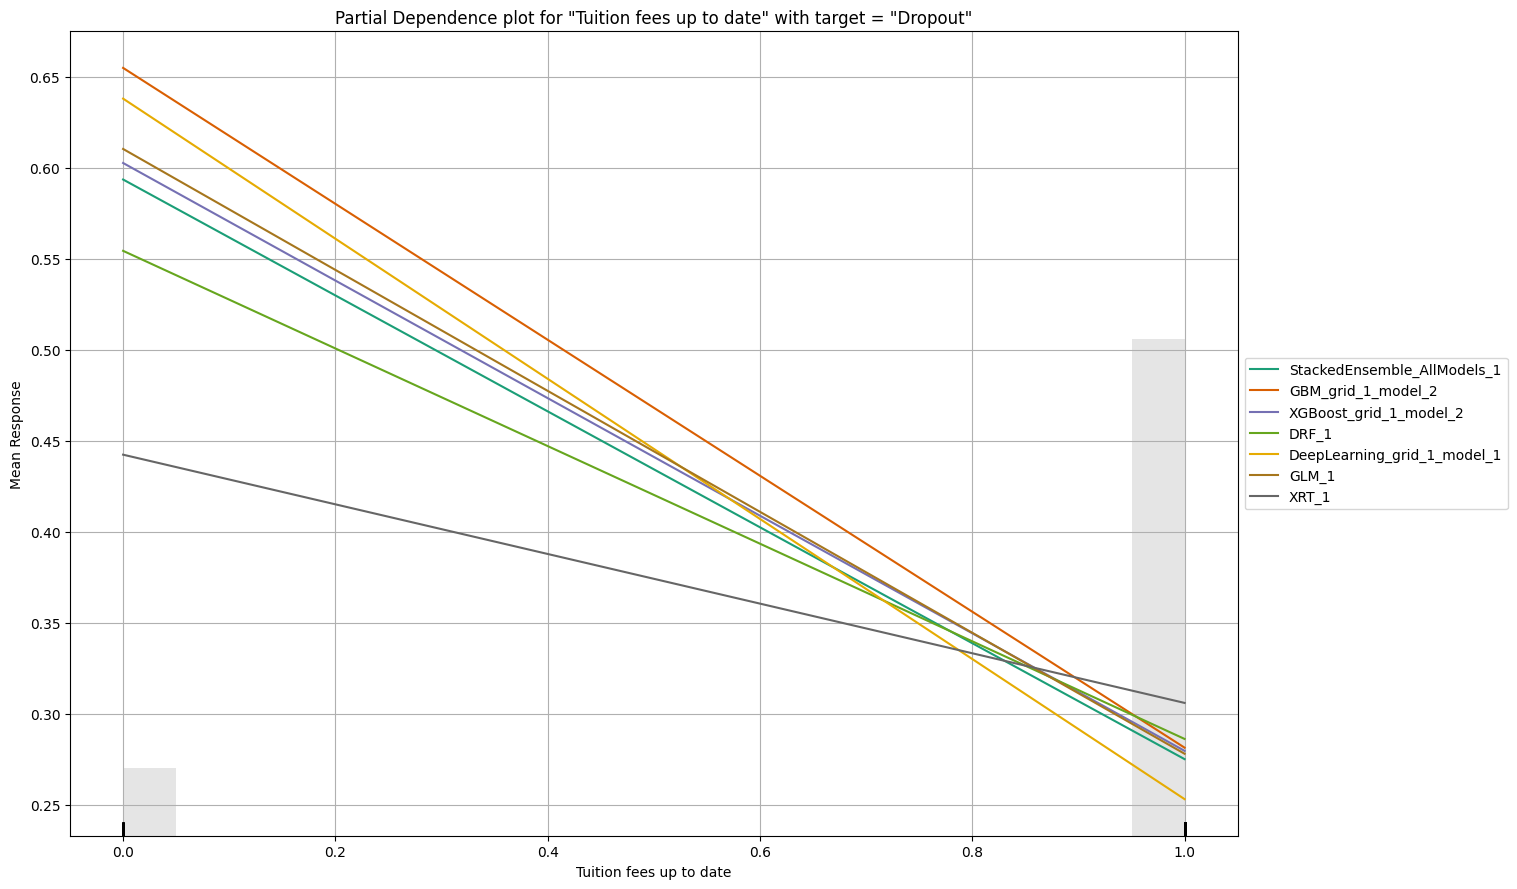

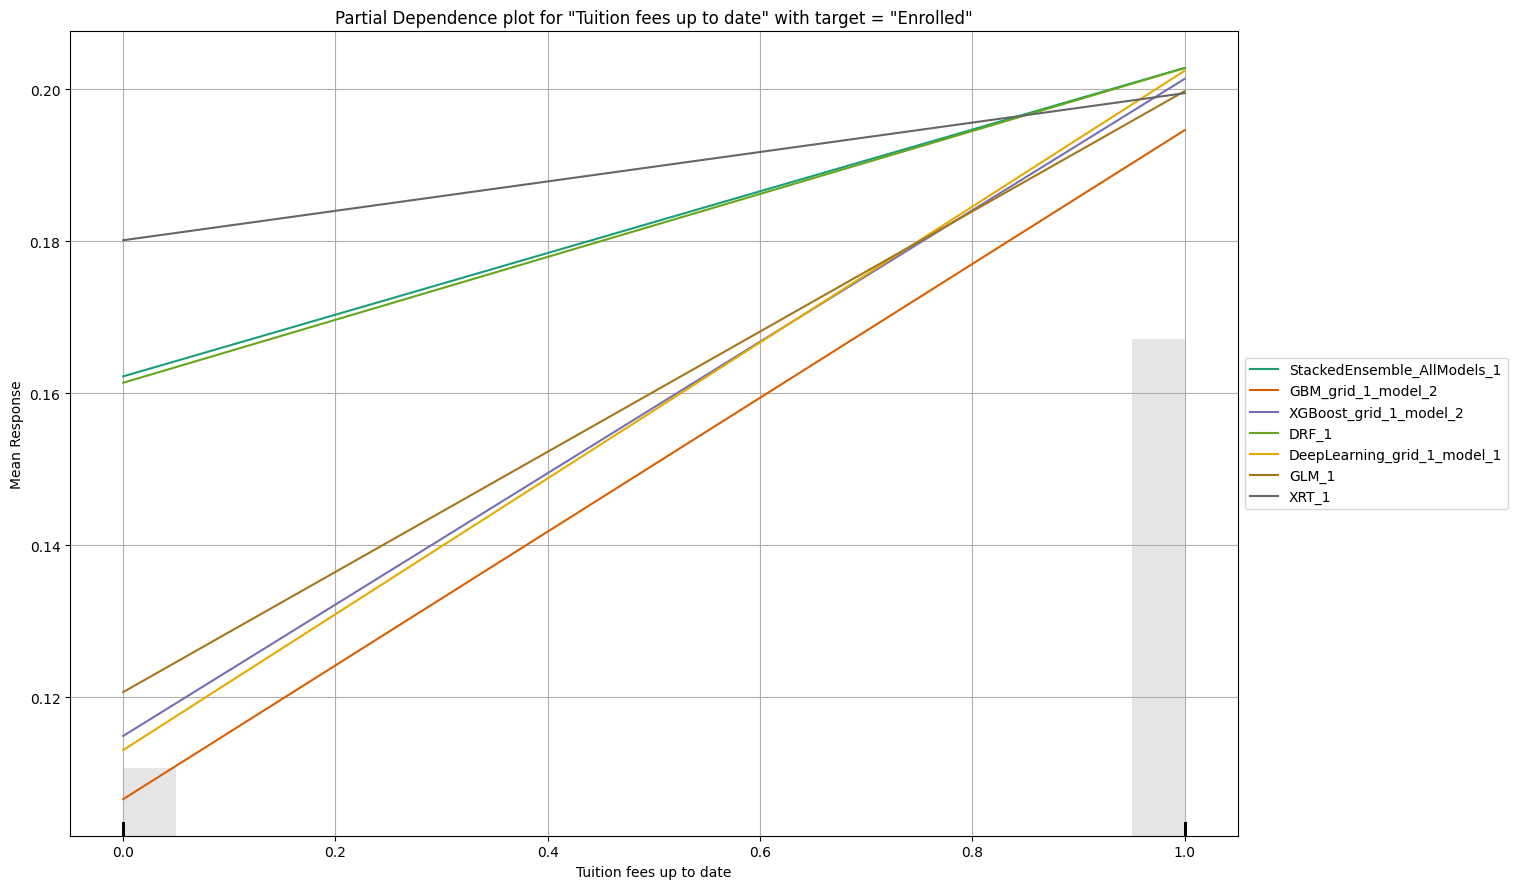

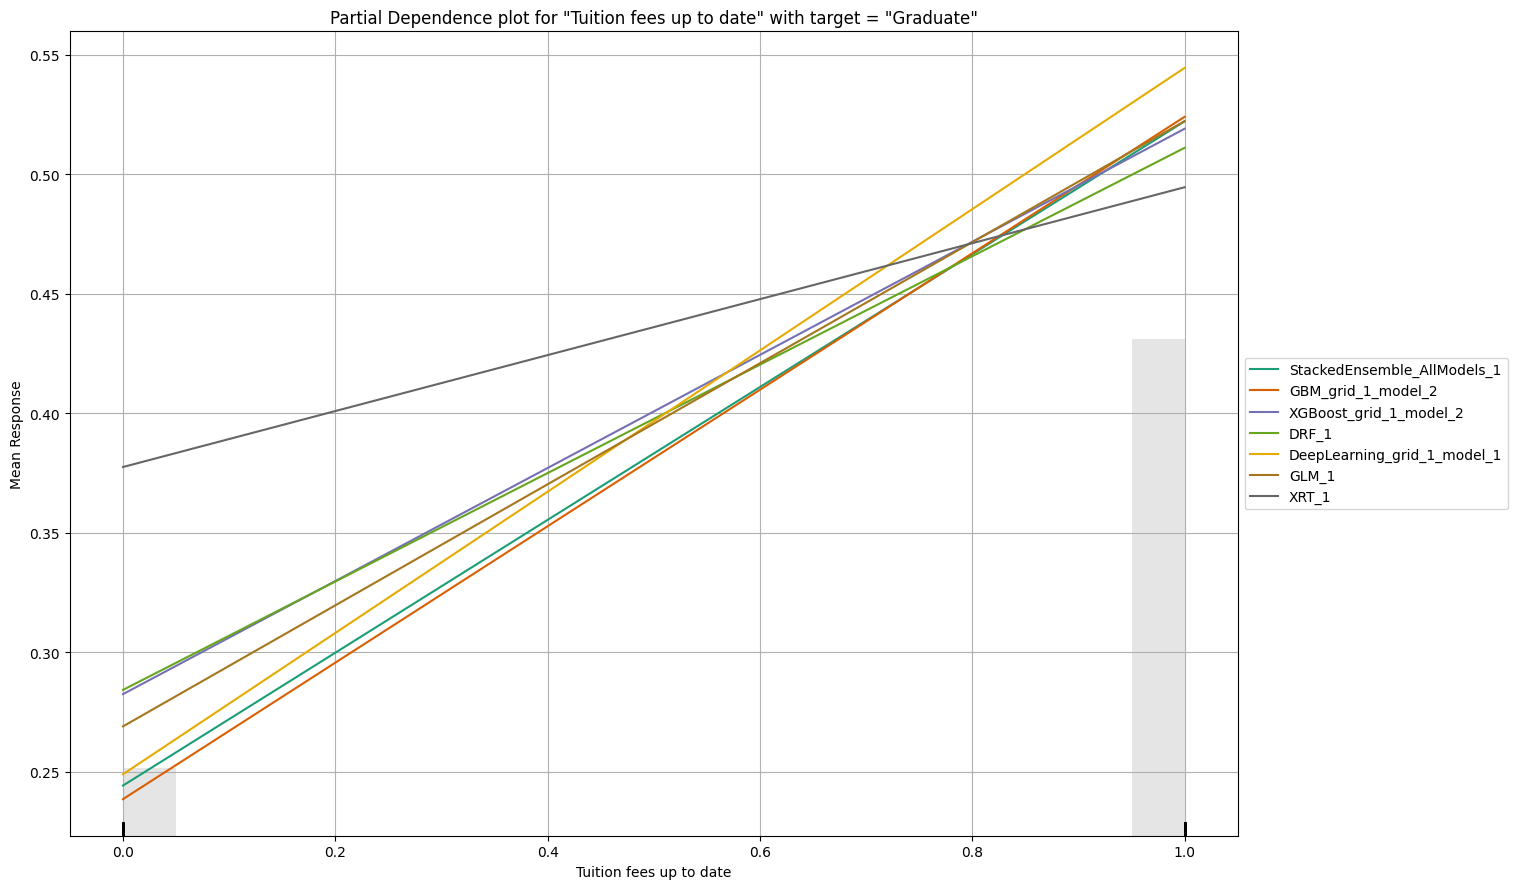

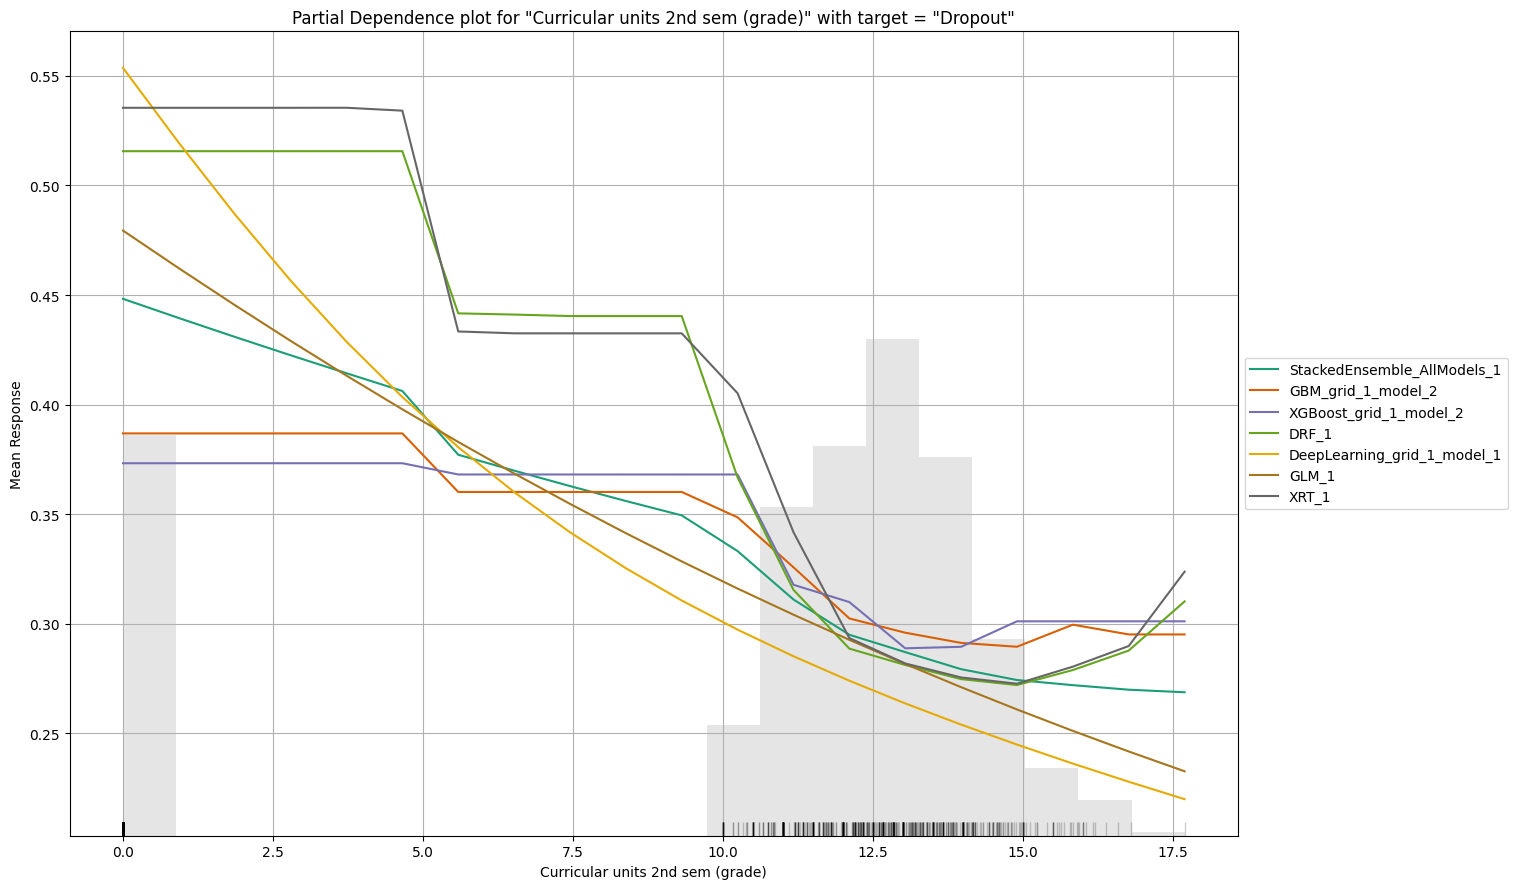

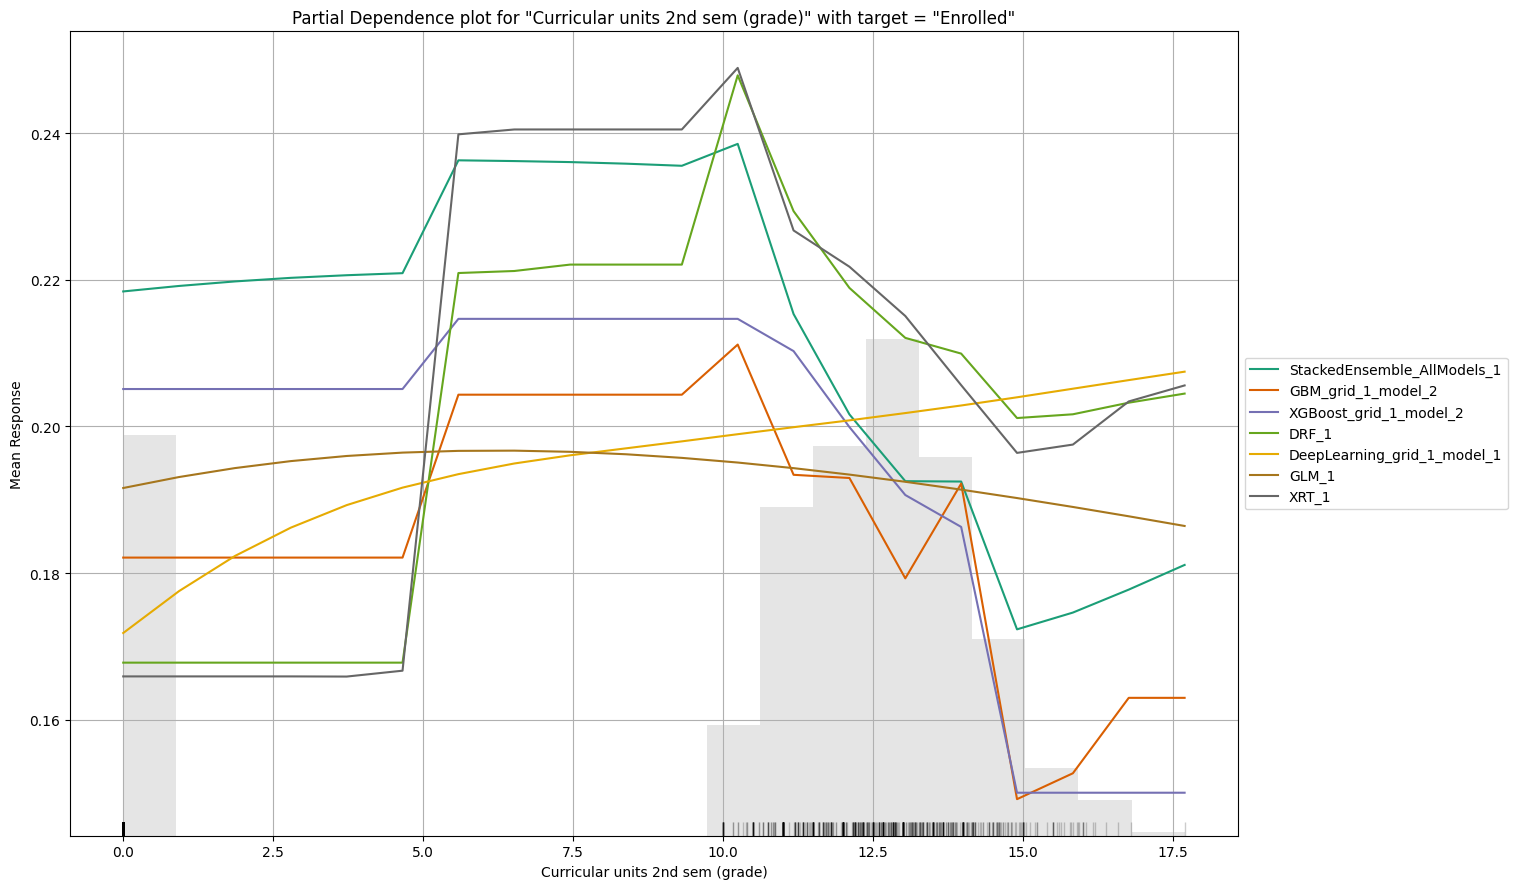

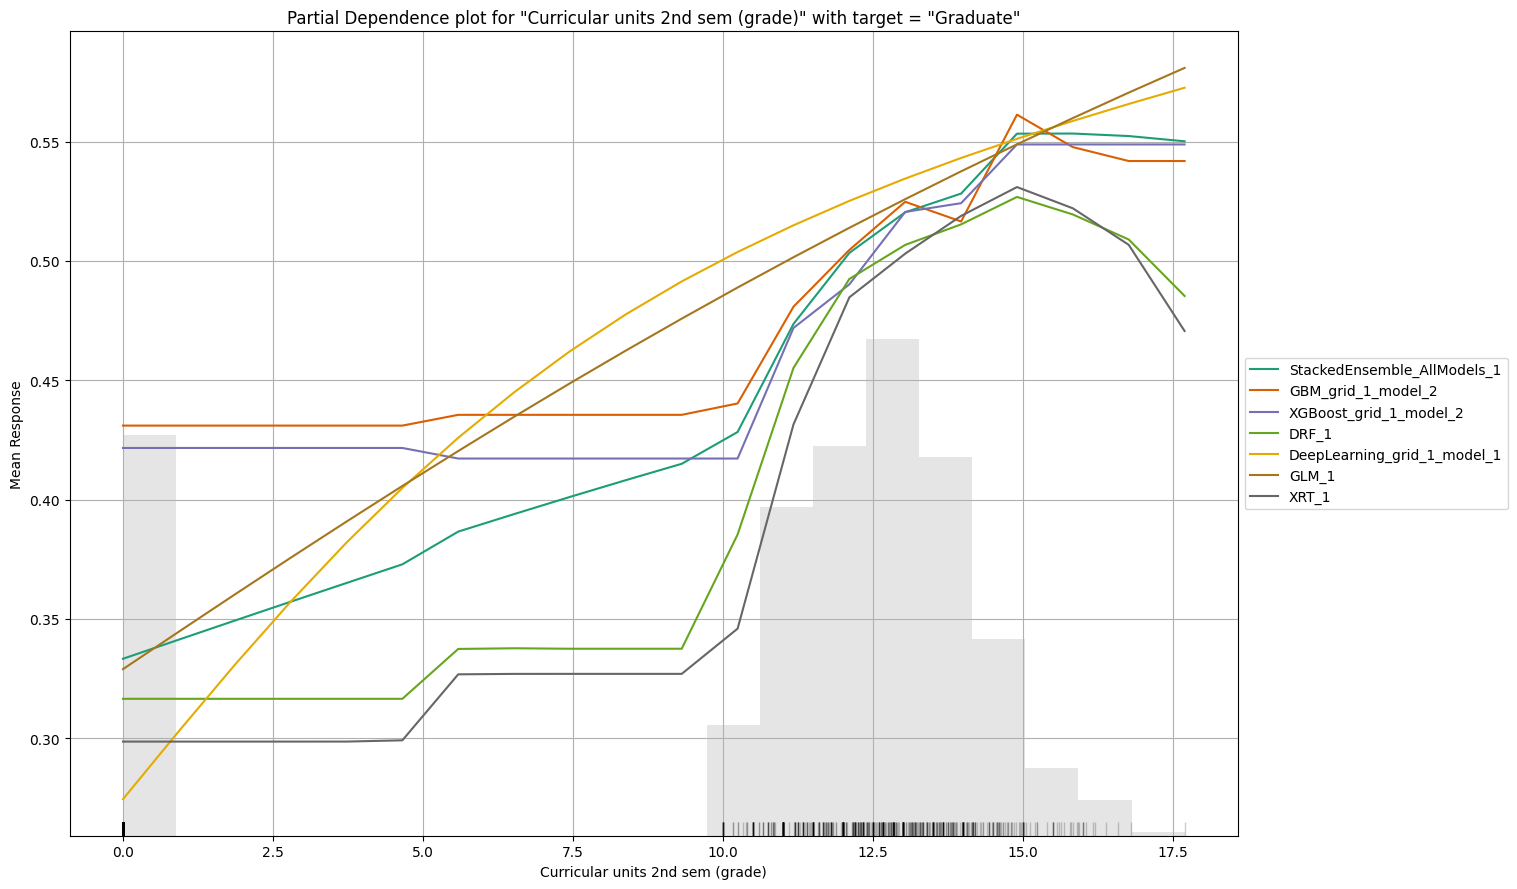

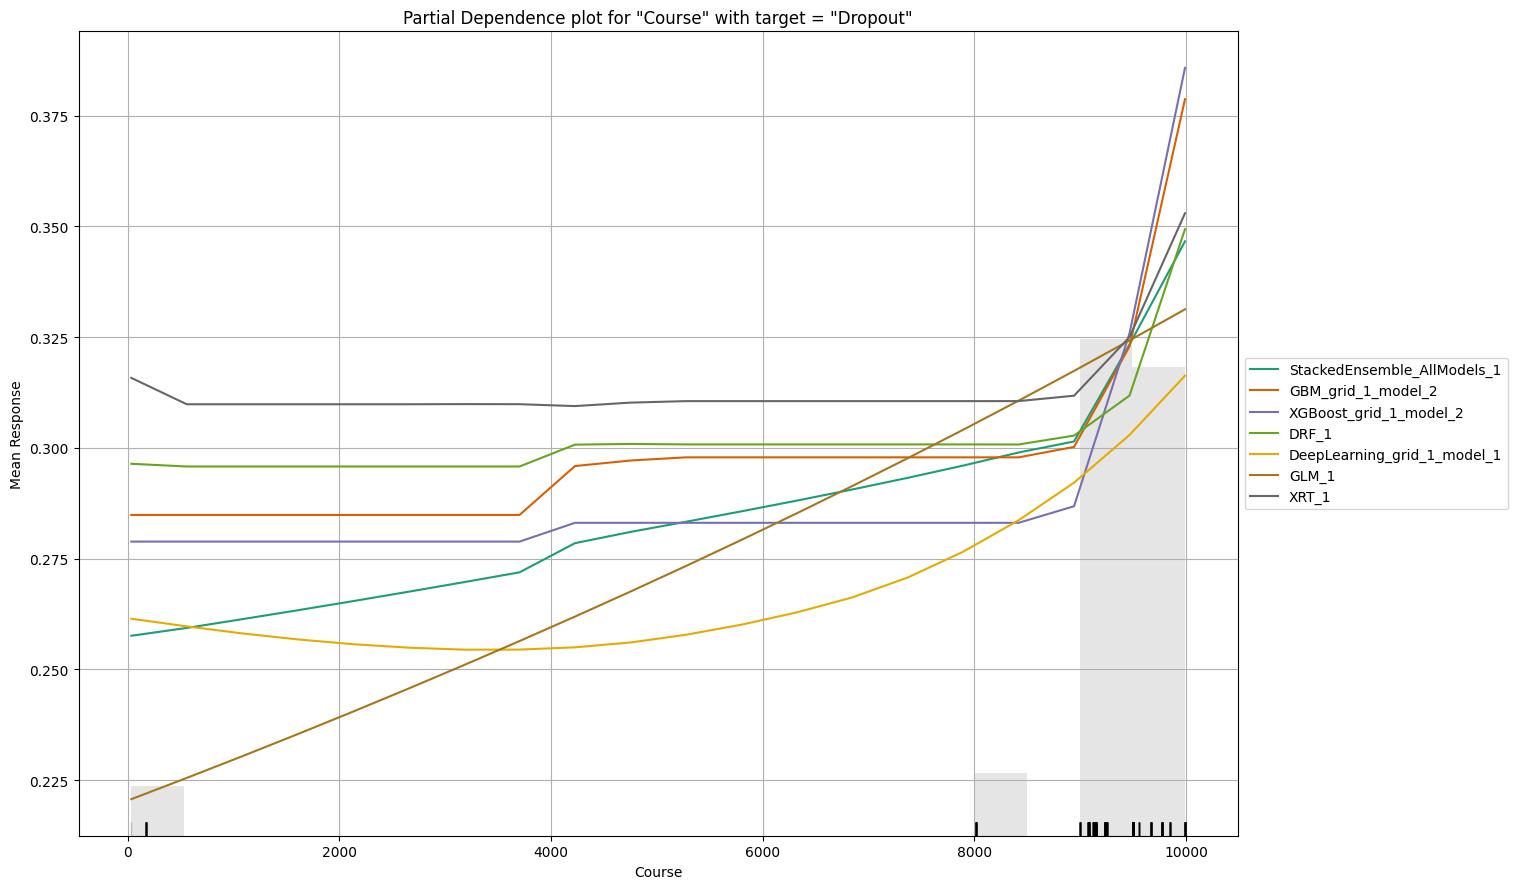

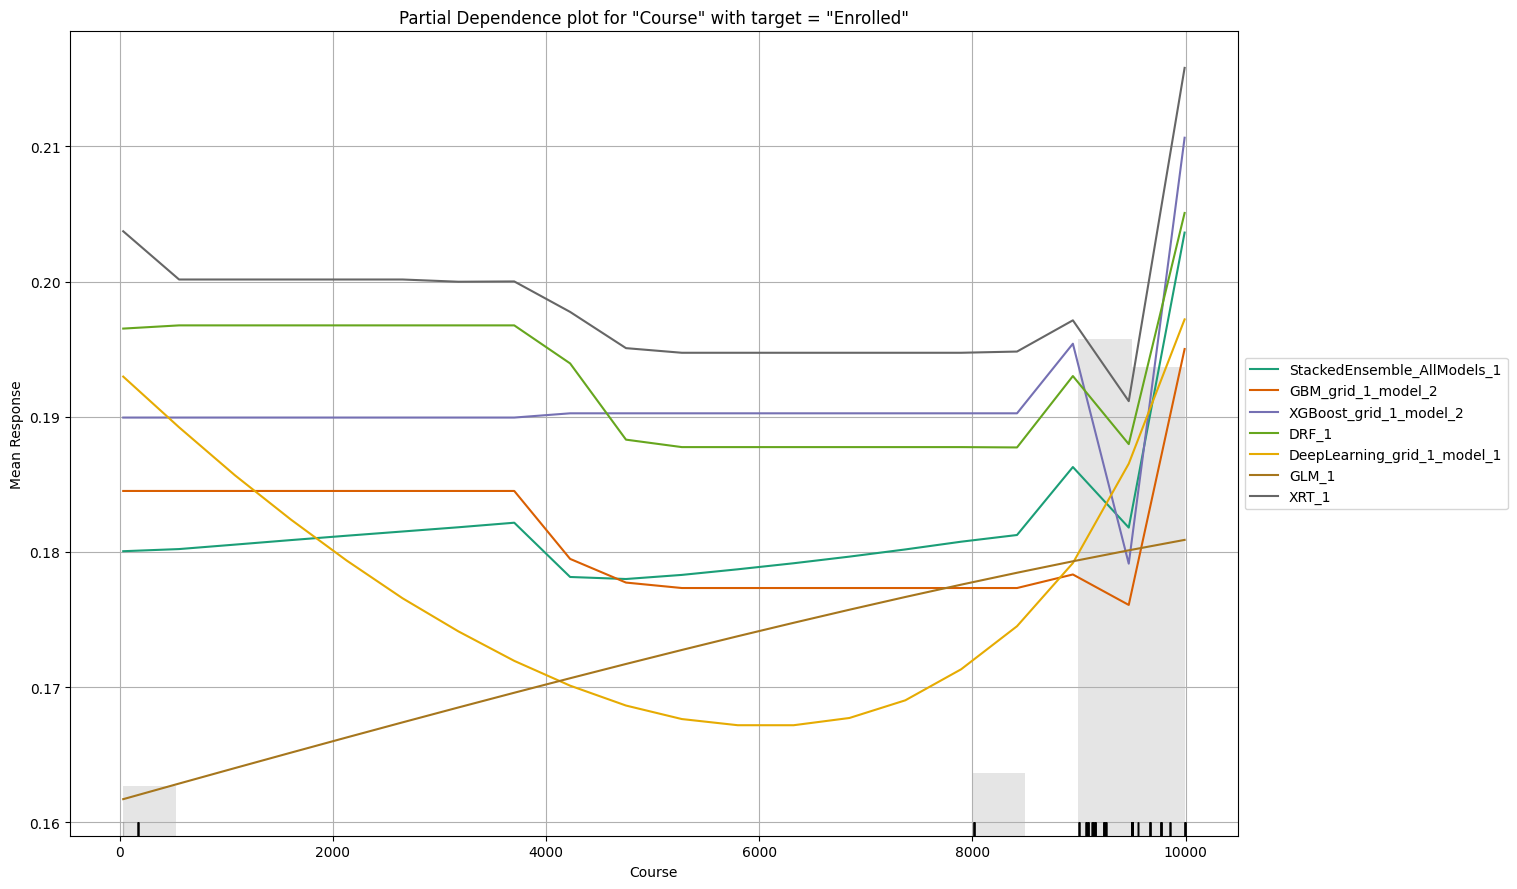

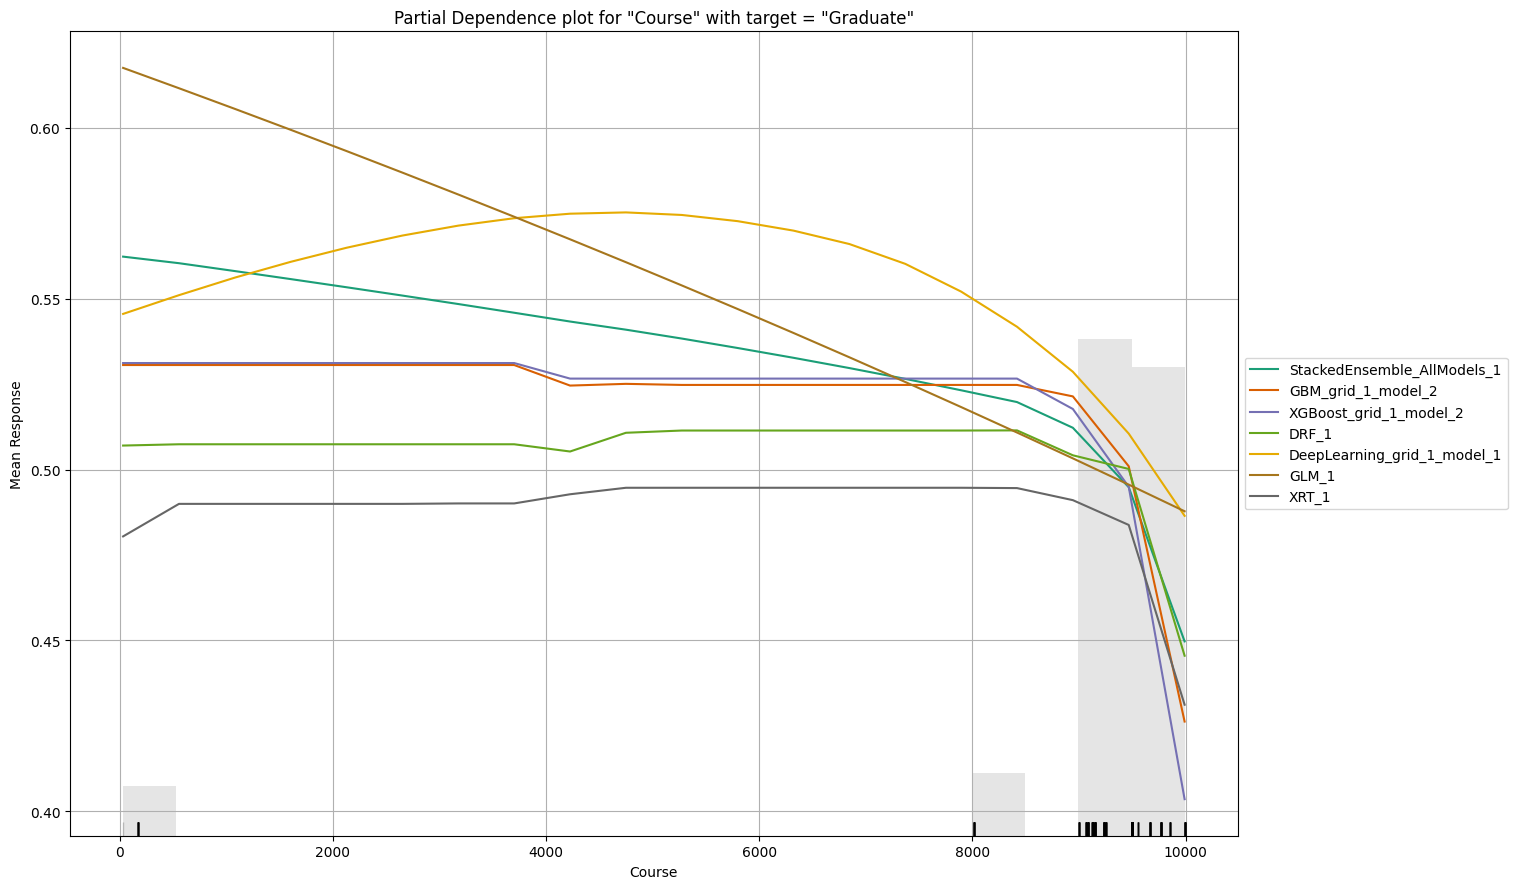

In [ ]:
# Explain a model
exm = model.explain(test)
exm

In [ ]:
# build a gbm model
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_model = H2OGradientBoostingEstimator(distribution = "multinomial", seed = 1234)
gbm_model.train(x = feature_col,
               y = target_col,
               training_frame = train,
               validation_frame = validation)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
NaN


In [ ]:
h2o_auc_table = gbm_model.multinomial_auc_table(train)
print(h2o_auc_table)

AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
